# Rappel de la thématique du jour

+ on va revoir la lecture de données avec geopandas, et on va afficher des données qui vont être contextualisées
+ puis on va examine les CRS systèmes de coordonnées de référence
+ et enfin on  "marier" les relations entre objets géométriques et données insérées afin de répondre à des questions

In [10]:
import geopandas, pandas
import shapely

On va récupérer des données sur Paris et les visualiser
+ sur une découpage en quartiers
https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`

+ sur des "sites" i.e. des stations de vélos
https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `paris_bike_stations_mercator.gpkg`

https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/dataviz/?disjunctive.name&disjunctive.is_installed&disjunctive.is_renting&disjunctive.is_returning&disjunctive.nom_arrondissement_communes

# Vous avez reçu les 2 fichiers par mail, créez un répertoire "data" à côté de fichier Jupyter
 paris_districts_utm.geojson,  paris_bike_stations_mercator.gpkg
# le but est ici de se familiariser

In [16]:
import geopandas
stationsVelo = geopandas.read_file("paris_stations_velo_mercator.gpkg")

In [17]:
type(stationsVelo)

geopandas.geodataframe.GeoDataFrame

In [18]:
stationsVelo.head()  # et essayez tail()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)


In [14]:
stationsVelo.shape

(1226, 4)

In [19]:
stationsVelo.columns

Index(['name', 'bike_stands', 'available_bikes', 'geometry'], dtype='object')

    + On souhaite faire un rendu visuel (rapide et facile) de l'étendue des données sur les stations de velo
    + sur une figure de type `matplotlib`

<AxesSubplot:>

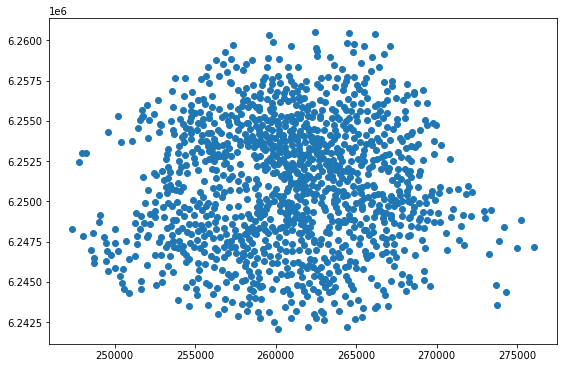

In [16]:
stationsVelo.plot(figsize=(12,6))

+ Ajoutons un fond de carte avec l'utilisation de la librairie `contextily`

In [20]:
import contextily
ax = stationsVelo.plot(figsize=(12,6), markersize=5)  
contextily.add_basemap(ax)

ModuleNotFoundError: No module named 'contextily'

<AxesSubplot:>

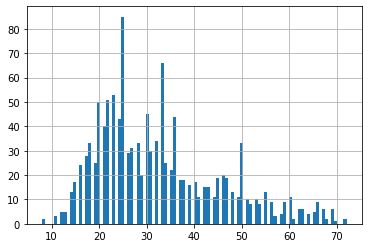

In [24]:
stationsVelo['bike_stands'].hist(bins=100)

In [25]:
# Visualiser les vélos disponibles grâce à la colonne `available_bikes'

<AxesSubplot:>

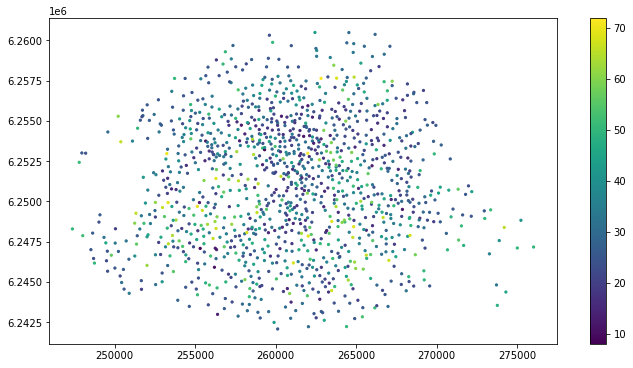

In [85]:
stationsVelo.plot(figsize=(12,6), markersize=5, column='bike_stands', legend=True)

# et les données des quartiers de Paris
+ on va lire de la même façon un GeoDataFrame pour récupérer les données
+ on vérifie les informatiosn dont dispose
+ on fait un affichage rapide

In [34]:
quartiers = geopandas.read_file("data/paris_districts_utm.geojson")

In [36]:
quartiers.tail()

,id,district_name,population,geometry
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5..."
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5..."
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5..."
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5..."
79,80,Charonne,62901,"POLYGON ((457155.511 5410584.127, 457153.394 5..."


In [37]:
quartiers.columns

Index(['id', 'district_name', 'population', 'geometry'], dtype='object')

In [38]:
quartiers.shape

(80, 4)

In [41]:
quartiers['population'].sum()

2125851

In [42]:
print(quartiers['population'].mean())
print(quartiers['population'].std())

26573.1375
20235.80484663215


<AxesSubplot:>

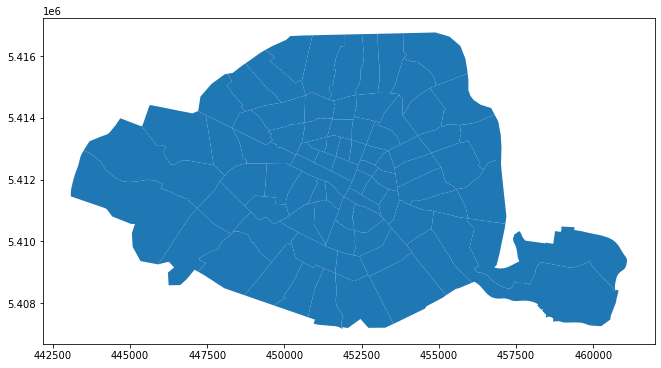

In [44]:
# on peut faire le rendu comme pour un fichier de données contenant des données ponctuelles
quartiers.plot(figsize=(12,6))

On peut réaliser grâce aux GeoDataFrame, différents calculs :
+ calcul de la superficie
+ on va ensuite rajouter cette information à chaque entrée (à chaque quartier)
+ on va effectuer un tri

In [45]:
# Pour obtenir la surface
quartiers.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [66]:
quartiers['aire']= quartiers.geometry.area /1000000.

In [67]:
quartiers.shape

(80, 6)

In [68]:
quartiers['infoBidon'] = 'sertARien'

In [69]:
quartiersParis = quartiers[['district_name', 'population', 'geometry', 'aire']]

In [70]:
quartiersParis.head()

,district_name,population,geometry,aire
0,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",0.868538
1,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",0.412237
2,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",0.273549
3,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
4,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",0.187910


In [71]:
# Comment trier de façon à faire apparaître quel quartier est le plus "grand" (de plus grande superficie)

In [74]:
quartierBis = quartiersParis.sort_values(by='aire', ascending=False)
quartierBis.head()

,district_name,population,geometry,aire
45,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383
60,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679
44,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841
61,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037
62,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061


In [78]:
# J'ai besoin de mes quartiers de Paris, décorés avec la densité de population
quartiers['densité_de_population'] = quartiers['population'] / quartiers.geometry.area * 1000000

In [84]:
#quartiersParis['densité_de_population']=  quartiers['population']/  quartiers.geometry.area * 1000000

<AxesSubplot:>

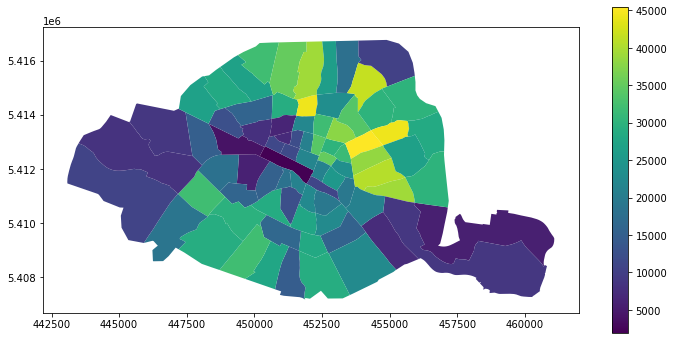

In [80]:
quartiers.plot(column='densité_de_population', figsize=(12,6), legend=True)

Opérations spatiales

**REFERENCE**:

Aperçu des différentes fonctions permettant de vérifier les relations spatiales (* prédicats spatiaux*) :

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


Voir  https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships pour un aperçu de ces méthodes.

On va réutiliser des données sur Paris mais on change les données sur les stations de velo
**paris_bike_stations.geojson**

In [22]:
import geopandas
quartiers = geopandas.read_file('data/paris_districts.geojson').to_crs(epsg=2154)
stationsVelo = geopandas.read_file('data/paris_bike_stations.geojson').to_crs(epsg=2154)  # Attention changements fichiers

In [23]:
quartiers.shape

(80, 4)

In [24]:
stationsVelo.shape

(1226, 4)

## L'idée est de manipuler des variables correspondant à des objets géométriques

In [25]:
from shapely.geometry import Point

tourEiffel = Point(648236.887, 6862269.359)
# vous allez chercher sur les coordonnées GPS, et vous faire une projection dans le CRS EPSG=2154
# il faut disposer d'un CRS conservant les distances

In [26]:
print(type(tourEiffel)) # print(tourEiffel)

<class 'shapely.geometry.point.Point'>


In [33]:
# Sélectionnons un ensemble de ligne
quartiers[50:70]

,id,district_name,population,geometry
50,51,Maison-Blanche,64797,"POLYGON ((652217.923 6859034.642, 652248.881 6..."
51,52,Croulebarbe,19526,"POLYGON ((652411.498 6859831.793, 652418.762 6..."
52,53,Montparnasse,18570,"POLYGON ((651670.004 6859619.306, 651645.053 6..."
53,54,Parc-de-Montsouris,19793,"POLYGON ((651829.718 6857540.678, 651827.788 6..."
54,55,Petit-Montrouge,37230,"POLYGON ((650755.614 6859550.713, 650930.657 6..."
55,56,Plaisance,57229,"POLYGON ((650173.639 6860197.640, 650191.259 6..."
56,57,Saint-Lambert,82032,"POLYGON ((648934.927 6860264.847, 648987.976 6..."
57,58,Necker,46932,"POLYGON ((649081.733 6861096.603, 649168.346 6..."
58,59,Grenelle,47411,"POLYGON ((648698.564 6861464.293, 648698.569 6..."
59,60,Javel 15Art,49092,"POLYGON ((647320.450 6859672.016, 647435.420 6..."


In [35]:
quartiers.iloc[52]  # 53 eme ligne

id                                                              53
district_name                                         Montparnasse
population                                                   18570
geometry         POLYGON ((651670.0043991335 6859619.305996083,...
Name: 52, dtype: object

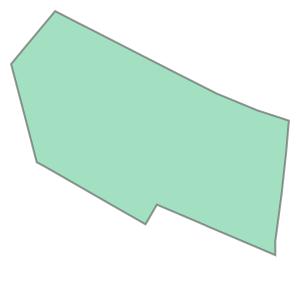

In [40]:
# avec les indes de la cellule
quartiers.loc[52]['geometry']

In [27]:
#On va par exemple esssayer de voir si on récupère la geométrie
Q_montparnasseIn = quartiers.loc[52]['geometry']

In [103]:
print(quartiers.loc[52])

id                                                              53
district_name                                         Montparnasse
population                                                   18570
geometry         POLYGON ((651670.0043991335 6859619.305996083,...
Name: 52, dtype: object


In [106]:
print(stationsVelo.loc[293, 'geometry'])

POINT (650694.9906680867 6859723.872719592)


In [118]:
print(stationsVelo.loc[293])

name                                 14033 - DAGUERRE GASSENDI
bike_stands                                                 38
available_bikes                                              1
geometry           POINT (650694.9906680867 6859723.872719592)
Name: 293, dtype: object


In [115]:
stationV_14 = stationsVelo.loc[293, 'geometry']

# ON PEUT MAINTENANT FAIRE DES CALCULS SUR LES OBJETS GEOMETRIQUES

Questions : interrogration des données avec
+ Point vs Polygon
+ Point vs LineString
+ LineString vs Polygon
+ et pareil avec les MultiXXXX

In [113]:
# La tour Eiffel est un POINT
print("La tour Eiffel, une localisation, est elle dans le quartier Montparnasse (V/F) : ", 
      tourEiffel.within(Q_montparnasseIn))

La tour Eiffel, une localisation, est elle dans le quartier Montparnasse (V/F) :  False


In [116]:
stationV_14 = stationsVelo.loc[293, 'geometry']  # la station est un POINT
Q_montparnasseIn.contains(stationV_14) # le Q_montparnasse est un POLYGON qui contient des objets

True

In [117]:
Q_montparnasseIn.contains(tourEiffel)

False

Il faut bien identifier ici que l'on programme et on fait interagir des objets Point, LineString, Polygon ou MultiPoint, MultiLineString, MultiPolygon.

On peut ensuite se poser d'autres questions.

In [120]:
print("La distance du monument à la station de vélo considérée : ", tourEiffel.distance(stationV_14))
# c'est du calcul Shapely

La distance du monument à la station de vélo considérée :  3538.6118813463263


In [121]:
tourEiffel.distance(Q_montparnasseIn) # distance d'un point à un polygone

2755.632878833073

## Il peut être intéressant de créer des filtres (ou masque avec polygones).
Par exemple, un filtre pour sélectionner les quartiers qui ne contiennent pas

In [ ]:
tourEiffel = Point(648236.887, 6862269.359)

In [122]:
masque = quartiers.contains(tourEiffel)

In [126]:
masque

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [124]:
# quel est le quartier qui contient la tour Eiffle
quartiers[masque]

,id,district_name,population,geometry
27,28,Gros-Caillou,25156,"POLYGON ((649336.752 6861767.761, 649110.815 6..."


## Il peut être intéressant de chercher les stations de vélos à proximité de la tour Eiffel (masque avec l'utilisation de la distance)
On va comparer des points avec un point (une localisation de référence)


In [130]:
# je crée comme on l'a déjà fait une série de valeur mais en utilisant une opération géométrique
tab_distance_eiffel = stationsVelo.distance(tourEiffel)

In [133]:
tab_distance_eiffel.min()
# c'est la distance minimale à la tour eiffer pour une station de vélo

229.87244706271005

In [136]:
# on en déduit qu'on peut fabriquer un filtre pour trouver toutes les stations à moins de 1000 m
station_proche_eiffel = stationsVelo[tab_distance_eiffel < 1000 ]

In [140]:
# vérifions la dataframe
station_proche_eiffel.head()

,name,bike_stands,available_bikes,geometry
263,15024 - LAOS,22,5,POINT (648728.356 6861434.945)
286,15028 - DUPLEIX,69,24,POINT (648038.777 6861494.699)
313,15025 - AMETTE,48,28,POINT (648392.589 6861497.926)
400,16112 - CHERNOVITZ,36,3,POINT (647331.479 6862122.655)
447,07022 - PONT DE L'ALMA,69,9,POINT (648809.115 6862626.943)


## On a pu travailler en géométrie dans le plan, passons maintenant vers un affichage en utilisant des tuiles openstreetmap

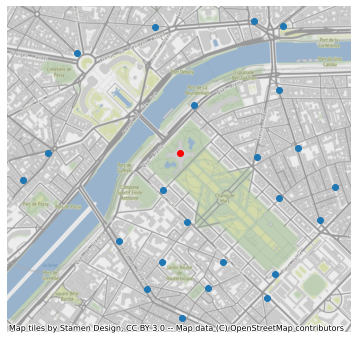

In [154]:
# On ré-utilise la procédure déjà étudiée au cours précédent
# ax1 est un tracé
ax1 = station_proche_eiffel.to_crs(epsg=3857).plot(figsize=(12,6))
# ma tour Eiffel est un objet géométrique Point et apriori ici ce n'est pas une entité dans GeoPandas
gp = geopandas.GeoSeries([tourEiffel], crs="EPSG:2154").to_crs(epsg=3857)
# gp.plot() est un tracé qui vient se poser sur le tracé ax1 grâce à la spécification du paramètre ax
gp.plot(ax=ax1, color='r')
import contextily
contextily.add_basemap(ax1)
ax1.set_axis_off()

In [155]:
quartiers2 = geopandas.read_file('data/paris_districts.geojson').to_crs(epsg=2154)

In [156]:
# une ligne with http://geojson.io
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection",
                                                "features":[{"type":"Feature","properties":{},
                                                             "geometry":{"type":"LineString",
                                                                         "coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

/Users/mb/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [157]:
s_seine_utm = s_seine.to_crs(epsg=2154)

<AxesSubplot:>

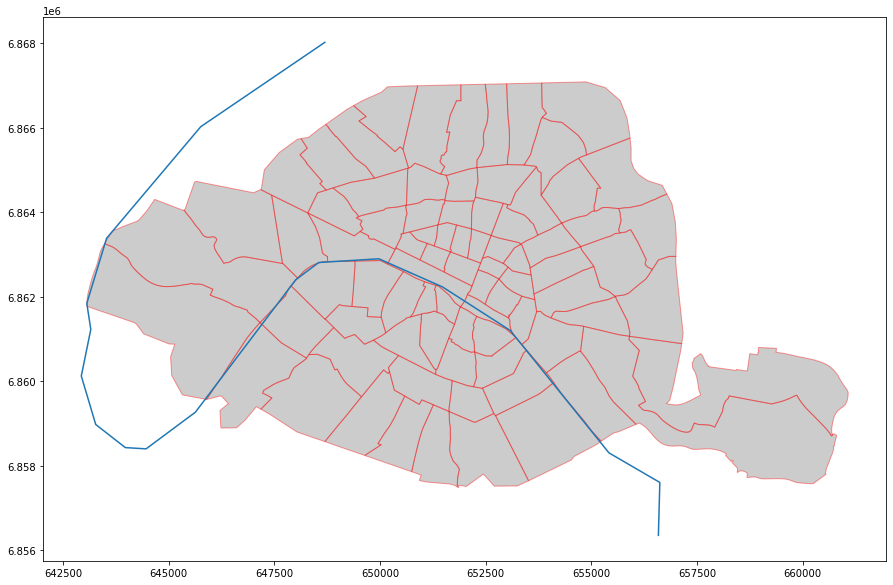

In [159]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20,10))
quartiers.plot(ax=ax1, color='grey', alpha=0.4, edgecolor='r')
s_seine_utm.plot(ax=ax1)

In [160]:
seine = s_seine_utm.geometry.squeeze()

In [161]:
# on crée un objet plus "épais" pour faire un sélection plus aisée par intersection des quartiers
 seineB = seine.buffer(150)

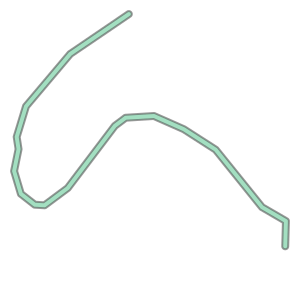

In [162]:
seineB

In [164]:
# les quartiers proches de la Seine
quartiers_Seine = quartiers [quartiers2.intersects(seineB)]

In [165]:
quartiers_Seine

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((651908.563 6861756.318, 651908.510 6..."
14,15,Arsenal,9474,"POLYGON ((653665.113 6861929.286, 653699.365 6..."
15,16,Notre-Dame,4087,"POLYGON ((653130.494 6861138.094, 653144.937 6..."
16,17,Saint-Victor,11661,"POLYGON ((652657.093 6860608.136, 652656.591 6..."
17,18,Jardin-des-Plantes,18005,"POLYGON ((653364.418 6860588.799, 653359.942 6..."
19,20,Sorbonne,9683,"POLYGON ((652241.104 6860693.450, 652214.664 6..."
20,21,Monnaie,6185,"POLYGON ((651801.554 6861461.268, 651764.594 6..."
23,24,Saint-Germain-des-Prés,5154,"POLYGON ((651348.236 6861734.417, 651349.496 6..."
24,25,Saint-Thomas-d'Aquin,12661,"POLYGON ((650255.993 6861236.498, 650138.350 6..."
25,26,Invalides,6276,"POLYGON ((650029.277 6861515.854, 650030.907 6..."


<AxesSubplot:>

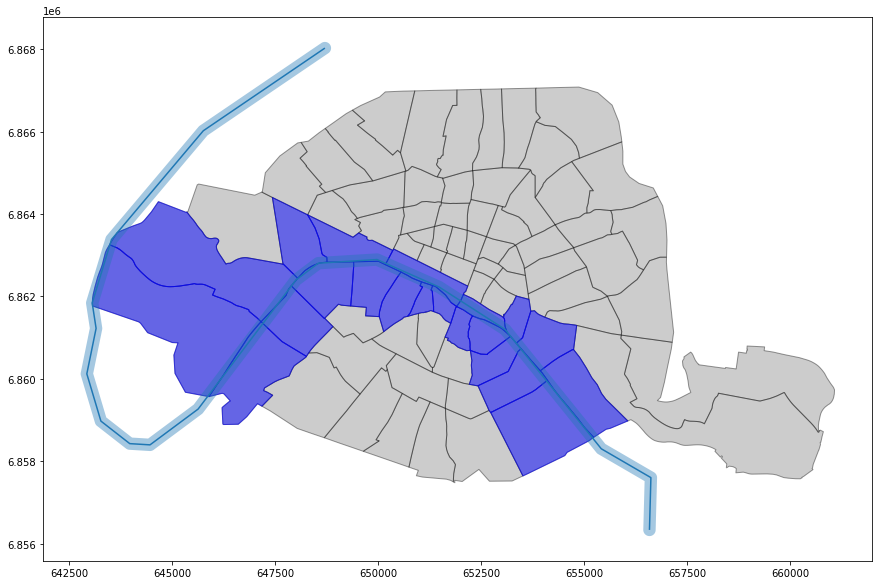

In [173]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20,10))
quartiers2.plot(ax=ax1, color='grey', alpha=0.4, edgecolor='k')
quartiers_Seine.plot(ax=ax1, color='blue', alpha=0.5, edgecolor='b')
geopandas.GeoSeries([seineB], crs="EPSG:2154").plot(ax=ax1, alpha=0.4,)
s_seine_utm.plot(ax=ax1)

In [ ]:
 # A VOUS DE COMPLETER POUR AFFICHER TOUTES LES STATIONS DE VELO SE TROUVANT DANS CES QUARTIERS PROCHES DE LA SEINE ET A MOINS D'1Km£
    